<a href="https://colab.research.google.com/github/MONICA-IT21/MACHINE_LEARNING/blob/main/DAY_6_DECISION_TREE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
%pylab inline
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
iris = datasets.load_iris()
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [5]:
df["target"].value_counts()

0.0    50
1.0    50
2.0    50
Name: target, dtype: int64

In [7]:
model = DecisionTreeClassifier(criterion="entropy",max_depth=2)

model.fit(iris.data, iris.target)
print(model)

DecisionTreeClassifier(criterion='entropy', max_depth=2)


In [8]:
model.score(iris.data, iris.target)

0.96

**MAKE PREDICTIONS**

In [9]:
expected = iris.target
predicted = model.predict(iris.data)

**SUMMARIZE THE FIT OF THE MODEL**

In [10]:
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.91      0.98      0.94        50
           2       0.98      0.90      0.94        50

    accuracy                           0.96       150
   macro avg       0.96      0.96      0.96       150
weighted avg       0.96      0.96      0.96       150

[[50  0  0]
 [ 0 49  1]
 [ 0  5 45]]


**TUNNING PARAMETERS**

In [11]:
def Decision_Tree(Type,Depth):
        # import some data to play with
        iris = datasets.load_iris()
        X = iris.data[:, :2]  # we only take the first two features.
        Y = iris.target
        h = .02  # step size in the mesh
        # we create an instance of Neighbours Classifier and fit the data.
        model =DecisionTreeClassifier(criterion=Type,max_depth=Depth)

        model.fit(X, Y)
        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, m_max]x[y_min, y_max].
        x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
        y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        plt.figure(1, figsize=(4, 3))
        plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

        # Plot also the training points
        plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
        plt.xlabel('Sepal length')
        plt.ylabel('Sepal width')
        plt.xlim(xx.min(), xx.max())
        plt.ylim(yy.min(), yy.max())
        plt.xticks(())
        plt.yticks(())
        plt.show()

        model.fit(iris.data, iris.target)
        expected = iris.target
        predicted = model.predict(iris.data)
        print(metrics.classification_report(expected, predicted))
        print(metrics.confusion_matrix(expected, predicted))

In [12]:
from IPython.html import widgets
from IPython.html.widgets import interact
from IPython.display import display

In [13]:
i = interact(Decision_Tree, Type=['gini','entropy'],Depth=(1,10))

interactive(children=(Dropdown(description='Type', options=('gini', 'entropy'), value='gini'), IntSlider(value…

In [15]:
import pandas as pd
import numpy as np
import math
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, confusion_matrix, f1_score, accuracy_score, precision_score, recall_score

from skimage import io

import matplotlib.pyplot as plt

import cv2

In [17]:
dataset = pd.read_csv('IRIS.csv')
print (len(dataset))
dataset.head()

150


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


<Axes: >

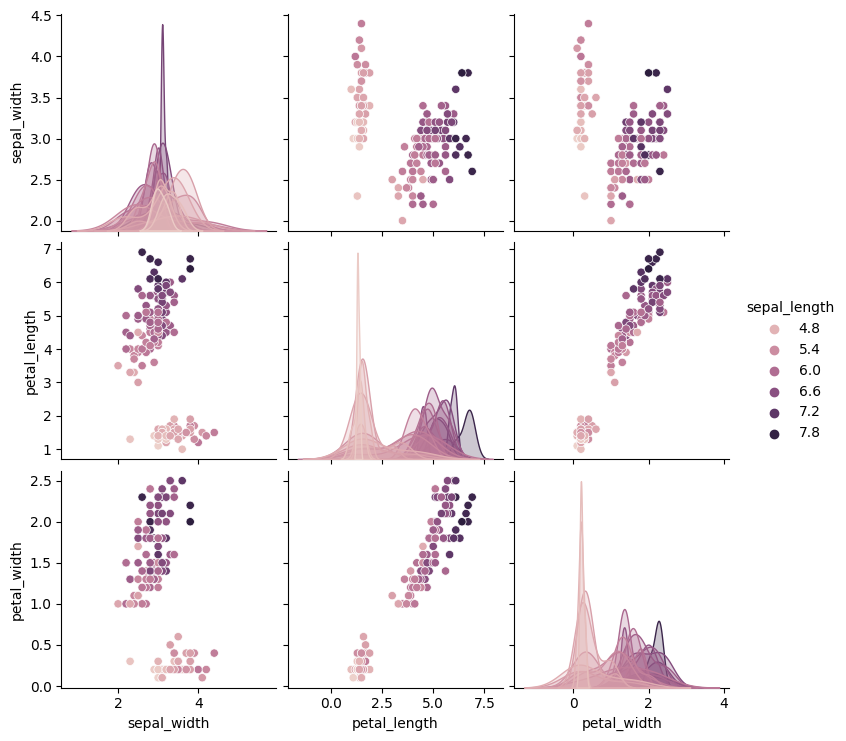

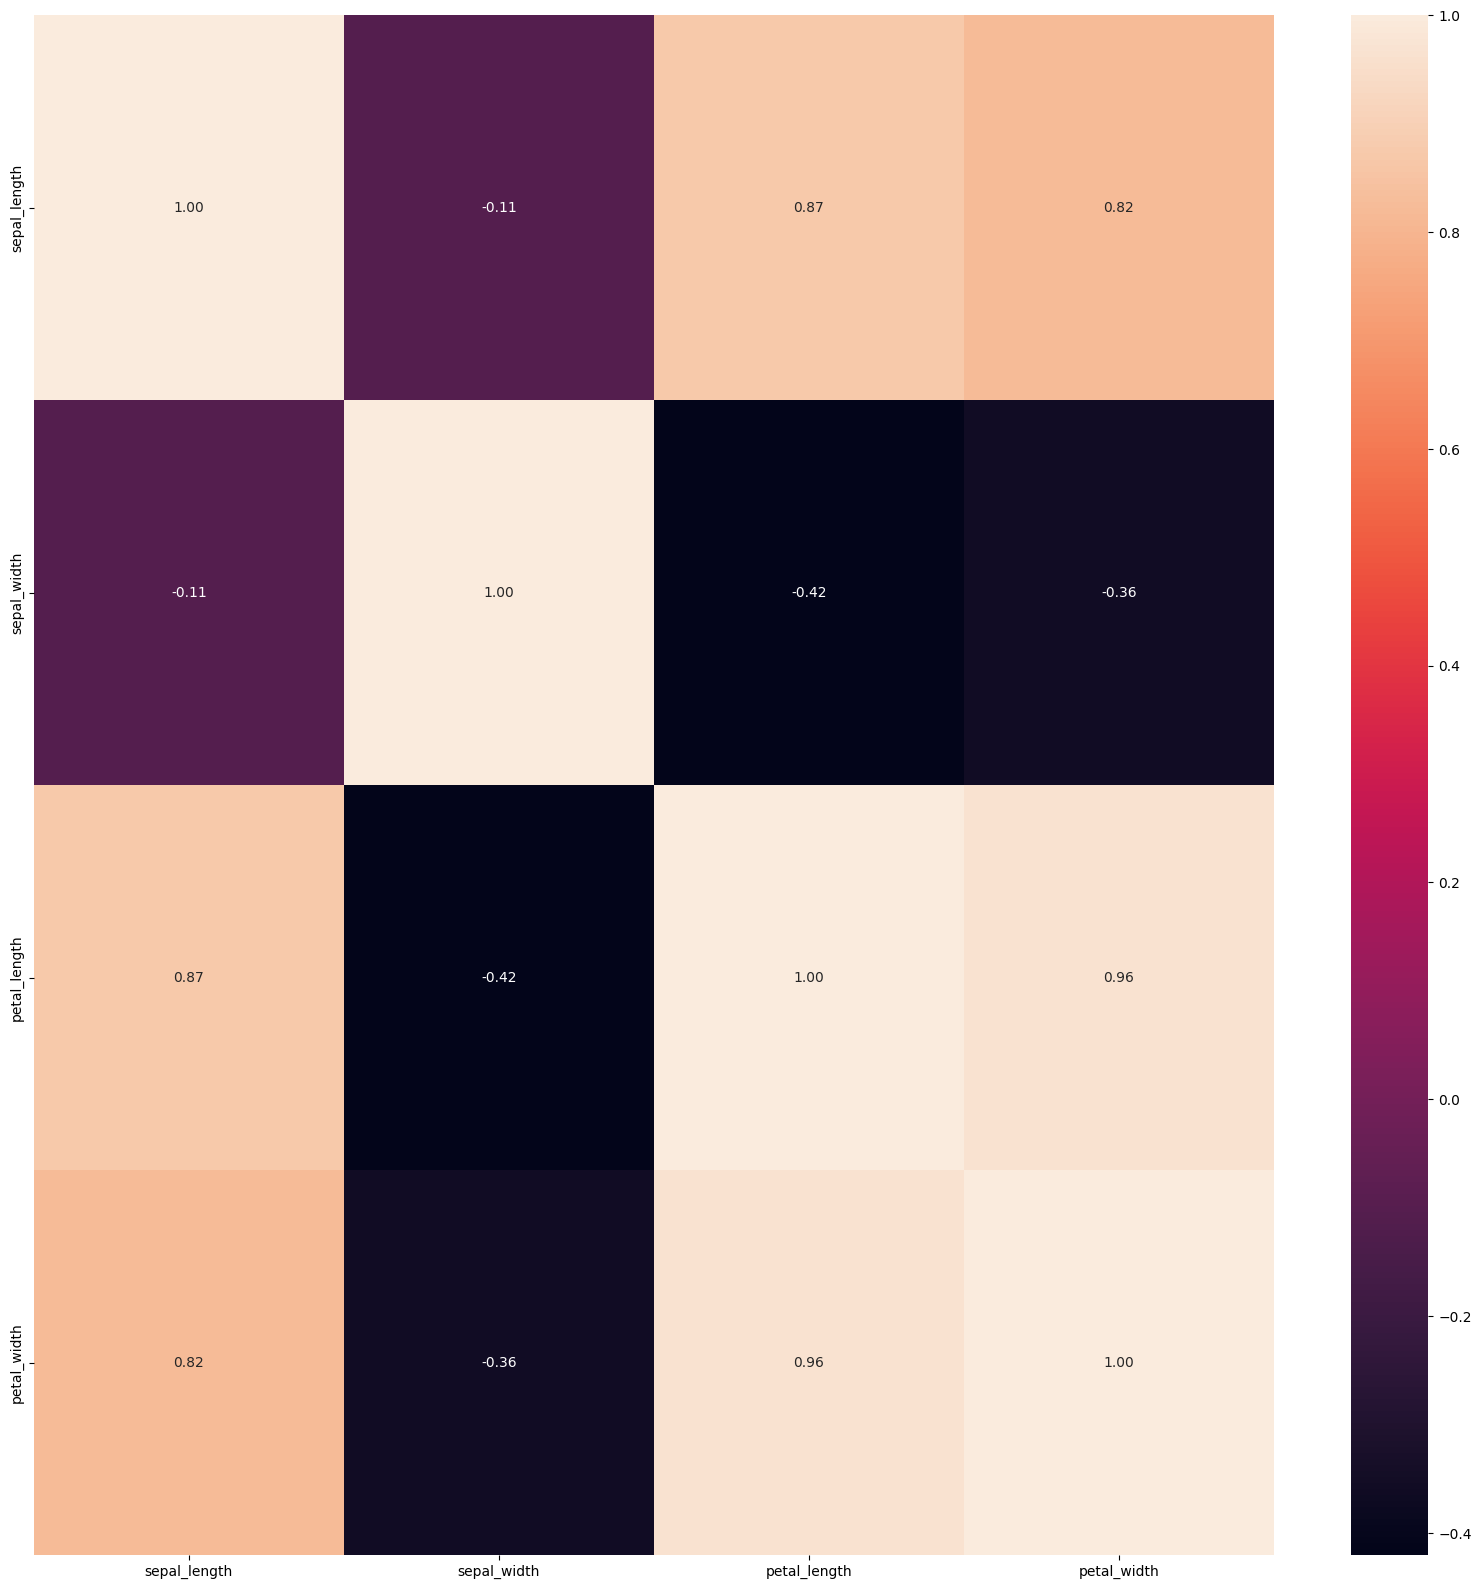

In [18]:
import seaborn as sns
sns.pairplot(dataset.iloc[: ,0:4], hue = 'sepal_length')
plt.subplots(figsize=(20, 20))
sns.heatmap(dataset.corr(), annot = True, fmt= '.2f')

In [19]:
#split target and attribute
x = dataset.iloc[:,0:4]
y = dataset.iloc[:,4]

#split train n test dataset
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=0, test_size=0.1)
print(len(y_test))
print(len(x_train))
print(len(dataset))

x.head()

15
135
150


,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [20]:
y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: species, dtype: object

Text(0.5, 1.0, 'testing')

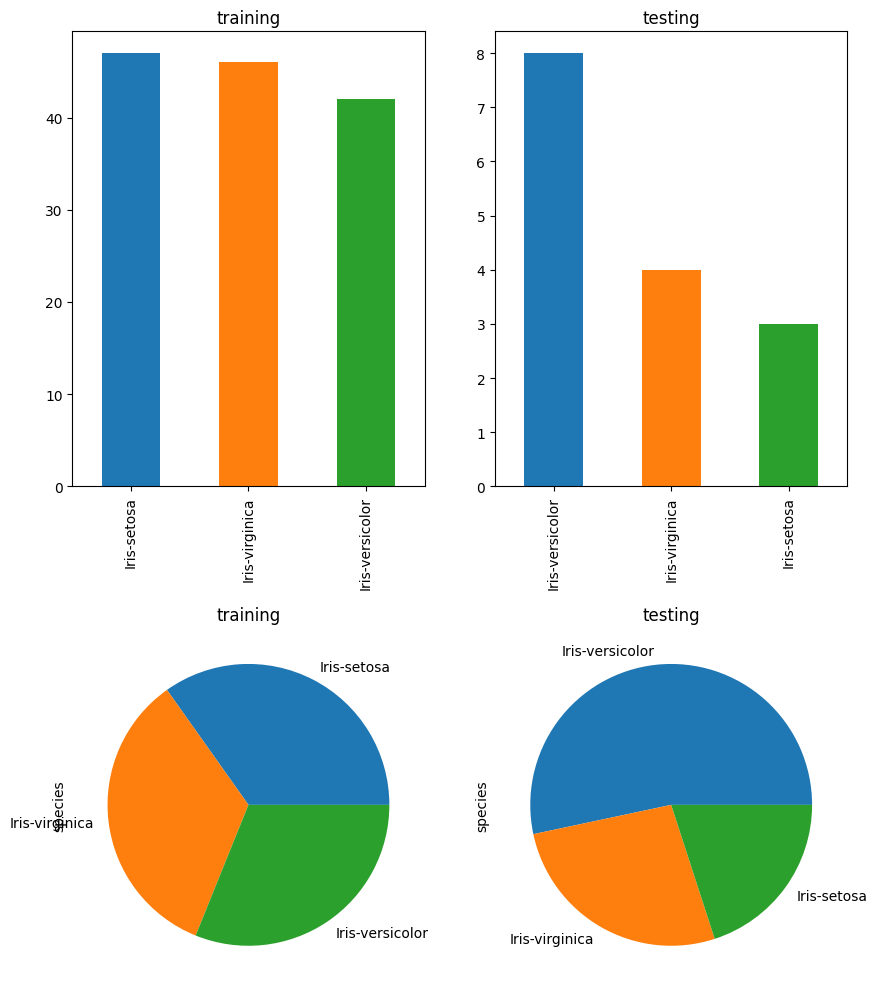

In [21]:
#SPLITTING VISUALIZATION
plt.figure(figsize=(10,13))
plt.subplot(2,2,1);y_train.value_counts().plot(kind='bar', color=['C0','C1','C2','C3','C4','C5','C6']);plt.title('training')
plt.subplot(2,2,2);y_test.value_counts().plot(kind='bar', color=['C0','C1','C2','C3','C4','C5','C6']);plt.title('testing')
plt.subplot(2,2,3);y_train.value_counts().plot(kind='pie');plt.title('training')
plt.subplot(2,2,4);y_test.value_counts().plot(kind='pie',);plt.title('testing')

In [22]:
#scaling data
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)
x_train

array([[-1.08593443,  0.09813652, -1.24448561, -1.41148027],
       [ 0.2219428 , -0.36672067,  0.44627813,  0.40699124],
       [-0.37254685, -1.06400644,  0.38991934,  0.01731878],
       [-1.20483236, -0.13429207, -1.3008444 , -1.15169862],
       [-0.49144478,  1.95756524, -1.35720319, -1.0218078 ],
       [-0.25364892, -0.59914926,  0.6717133 ,  1.05644535],
       [-0.25364892, -0.13429207,  0.44627813,  0.40699124],
       [-1.20483236,  0.79542229, -1.01905044, -1.28158945],
       [-1.68042408, -0.36672067, -1.3008444 , -1.28158945],
       [ 0.45973866, -0.59914926,  0.61535451,  0.79666371],
       [-1.44262822,  1.26027947, -1.52627956, -1.28158945],
       [-0.84813857,  1.72513665, -1.01905044, -1.0218078 ],
       [ 0.45973866, -0.36672067,  0.33356055,  0.1472096 ],
       [-0.9670365 , -1.76129221, -0.23002736, -0.24246287],
       [-0.9670365 ,  0.79542229, -1.18812682, -1.0218078 ],
       [ 0.69753452,  0.09813652,  1.00986605,  0.79666371],
       [-0.49144478, -0.

In [23]:
#choose method
method = DecisionTreeClassifier()

# Cross-validation
accuracy = cross_val_score(method, x, y, cv=10, scoring='accuracy')
precision = cross_val_score(method, x, y, cv=10, scoring='precision_weighted')
recall = cross_val_score(method, x, y, cv=10, scoring='recall_weighted')
f1 = cross_val_score(method, x, y, cv=10, scoring='f1_weighted')

print('accuracy:', accuracy.mean())
print('precision:', precision.mean())
print('recall:', recall.mean())
print('F1-Score:', f1.mean())

accuracy: 0.9533333333333334
precision: 0.9588888888888889
recall: 0.96
F1-Score: 0.952996632996633


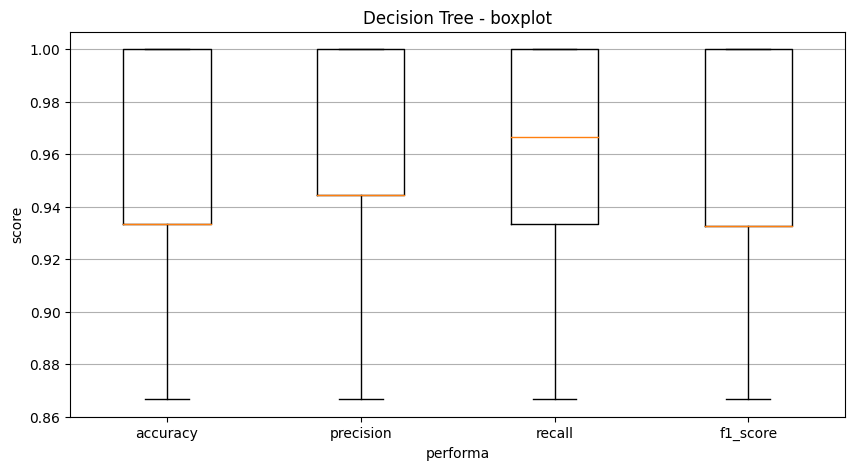

In [24]:
#BOXPLOT VISUALIZATION

fig1, ax1 = plt.subplots(figsize=(10,5))

#green_diamond = dict(markerfacecolor='g', marker='D')
red_square = dict(markerfacecolor='r', marker='s')


# grouping
all_data = [accuracy,precision,recall,f1]
ax1.set_title('Decision Tree - boxplot')

# plot box plot
ax1.boxplot(all_data,notch=False,flierprops=red_square)




#adding horizontal grid lines
ax1.yaxis.grid(True)
ax1.set_xticks([y +1 for y in range(len(all_data))])
ax1.set_xlabel('performa')
ax1.set_ylabel('score')

#add x-tick labels
plt.setp(ax1, xticks=[y+1 for y in range(len(all_data))],
         xticklabels=[ 'accuracy','precision','recall','f1_score'])
plt.show()

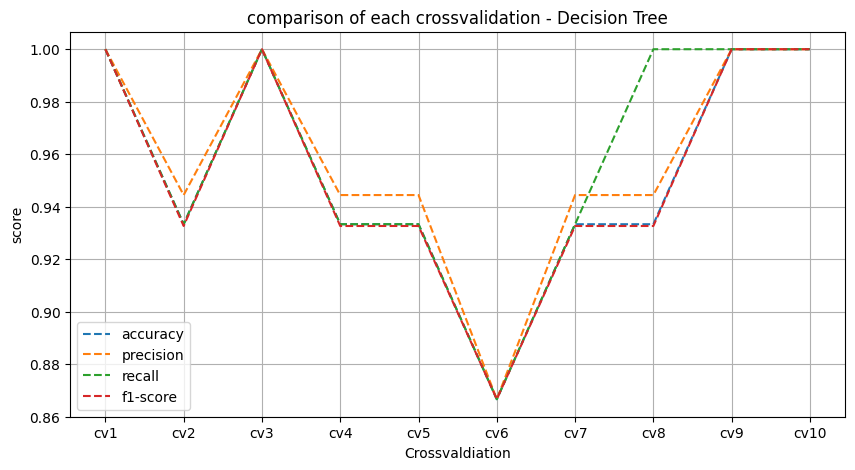

In [25]:
plt.figure(figsize=(10,5))
x = ["cv1", "cv2", "cv3", "cv4", "cv5", "cv6", "cv7", "cv8", "cv9", "cv10"]
plt.plot(x, accuracy, '--')
plt.plot(x, precision, '--')
plt.plot(x, recall, '--')
plt.plot(x, f1, '--')
plt.title("comparison of each crossvalidation - Decision Tree")
plt.xlabel("Crossvaldiation")
plt.ylabel("score")
plt.legend(["accuracy","precision", "recall", "f1-score"])
plt.grid()
plt.show()